<B>This notebook plots data on COVID19 from CSSE at Johns Hopkins University's Github</B>

In [1]:
MovingAveDays = 5 #adjust this as desired...

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import dateutil.parser

In [3]:
#get the data from CSSE at Johns Hopkins University's Github
confirmed = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recovered = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [4]:
#drop the lat, long, and county columns
C = confirmed.drop(confirmed.columns[[0, 2,3]], axis = 1)
D = deaths.drop(deaths.columns[[0, 2,3]], axis = 1)
R = recovered.drop(recovered.columns[[0, 2,3]], axis = 1)
#sum up values to 1 value per day per country
C2 = C.groupby('Country/Region').sum().transpose()
D2 = D.groupby('Country/Region').sum().transpose()
R2 = R.groupby('Country/Region').sum().transpose()
#parse the datetime fields
C2.index = pd.to_datetime(C2.index)
D2.index = pd.to_datetime(D2.index)
R2.index = pd.to_datetime(R2.index)

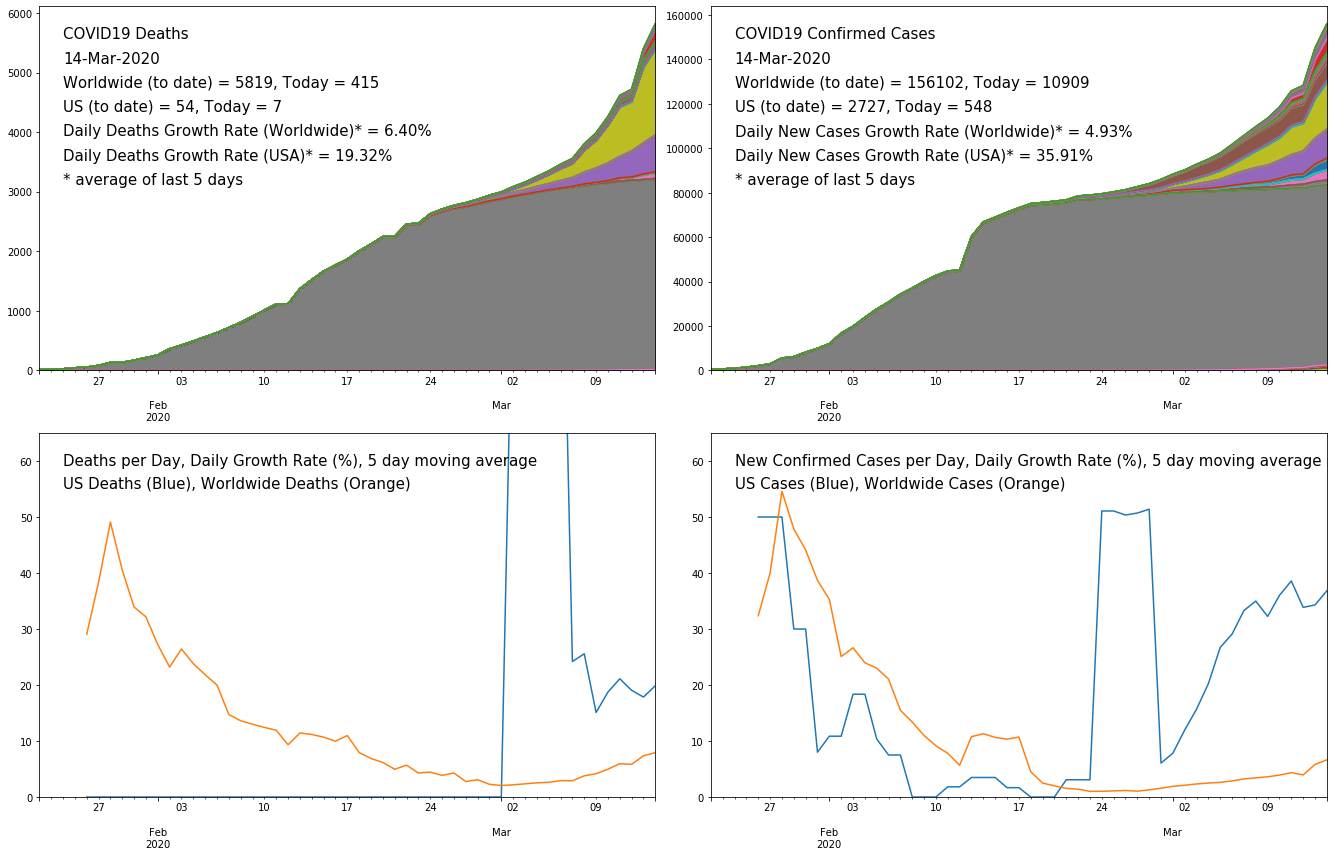

In [7]:
#Plot data

#Set up plot
fig, ((axarr1, axarr2), (axarr3, axarr4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

#latest date in data set
Date = D2.index[-1] 

#Set up the data - deaths
#total number of deaths worldwide, up to the latest date in the data set
WWDeathsToDate = D2.iloc[-1,:].sum() 
#Worldwide deaths on latest date
WWDeathsLatestDay = D2.iloc[-1,:].sum()-D2.iloc[-2,:].sum()
#Worldwide death growth curve
WWDeathGrowthCurve = D2.sum(axis=1).pct_change().replace([np.inf, -np.inf], np.nan).fillna(0).rolling(window=MovingAveDays).mean()*100
#latest worldwide death growth rate based on moving average
LatestWWDeathsGrowthRate = sum(WWDeathGrowthCurve[-MovingAveDays:])/MovingAveDays
#total US deaths to latest date
USDeathsToDate = D2['US'][-1] 
#US deaths on latest date
USDeathsLatestDay = D2['US'][-1]-D2['US'][-2]
#latest US death growth rate over moving average
USDeathGrowthCurve = D2['US'].pct_change().replace([np.inf, -np.inf], np.nan).fillna(0).rolling(window=MovingAveDays).mean()*100
#latest US death growth rate based on moving average
LatestUSDeathsGrowthRate = sum(USDeathGrowthCurve[-MovingAveDays:])/MovingAveDays

#Set up the data - confirmed cases
#total number of confirmed cases worldwide, up to the latest date in the data set
WWCasesToDate = C2.iloc[-1,:].sum() 
#Worldwide cases on latest date
WWCasesLatestDay = C2.iloc[-1,:].sum()-C2.iloc[-2,:].sum()
#Worldwide confirmed cases growth curve
WWCasesGrowthCurve = C2.sum(axis=1).pct_change().replace([np.inf, -np.inf], np.nan).fillna(0).rolling(window=MovingAveDays).mean()*100
#latest worldwide confirmed cases growth rate based on moving average
LatestWWCasesGrowthRate = sum(WWCasesGrowthCurve[-MovingAveDays:])/MovingAveDays
#total US confirmed cases to latest date
USCasesToDate = C2['US'][-1] 
#US confirmed cases on latest date
USCasesLatestDay = C2['US'][-1]-C2['US'][-2]
#latest US confirmed cases growth rate over moving average
USCasesGrowthCurve = C2['US'].pct_change().replace([np.inf, -np.inf], np.nan).fillna(0).rolling(window=MovingAveDays).mean()*100
#latest US confirmed cases growth rate based on moving average
LatestUSCasesGrowthRate = sum(USCasesGrowthCurve[-MovingAveDays:])/MovingAveDays

#plot stacked area chart of deaths
D2.plot(kind='area', legend=False, ax=axarr1)
axarr1.text(D2.index[2], WWDeathsToDate*.97, "COVID19 Deaths", ha="left", va="center", rotation=0, size=15)
axarr1.text(D2.index[2], WWDeathsToDate*.9, str(Date.strftime("%d-%b-%Y")), ha="left", va="center", rotation=0, size=15)
axarr1.text(D2.index[2], WWDeathsToDate*.83, "Worldwide (to date) = " + str(WWDeathsToDate) + ", Today = " + str(WWDeathsLatestDay), ha="left", va="center", rotation=0, size=15)
axarr1.text(D2.index[2], WWDeathsToDate*.76, "US (to date) = " + str(USDeathsToDate) + ", Today = " + str(USDeathsLatestDay), ha="left", va="center", rotation=0, size=15)
axarr1.text(D2.index[2], WWDeathsToDate*.69, "Daily Deaths Growth Rate (Worldwide)* = " + "{:.2f}".format(LatestWWDeathsGrowthRate) + '%', ha="left", va="center", rotation=0, size=15)
axarr1.text(D2.index[2], WWDeathsToDate*.62, "Daily Deaths Growth Rate (USA)* = " + "{:.2f}".format(LatestUSDeathsGrowthRate) + '%', ha="left", va="center", rotation=0, size=15)
axarr1.text(D2.index[2], WWDeathsToDate*.55, '* average of last ' + str(MovingAveDays) + ' days', ha="left", va="center", rotation=0, size=15)

#plot stacked area chart of confirmed cases
C2.plot(kind='area', legend=False, ax=axarr2)
axarr2.text(C2.index[2], WWCasesToDate*.97, "COVID19 Confirmed Cases", ha="left", va="center", rotation=0, size=15)
axarr2.text(C2.index[2], WWCasesToDate*.9, str(Date.strftime("%d-%b-%Y")), ha="left", va="center", rotation=0, size=15)
axarr2.text(C2.index[2], WWCasesToDate*.83, "Worldwide (to date) = " + str(WWCasesToDate) + ", Today = " + str(WWCasesLatestDay), ha="left", va="center", rotation=0, size=15)
axarr2.text(C2.index[2], WWCasesToDate*.76, "US (to date) = " + str(USCasesToDate) + ", Today = " + str(USCasesLatestDay), ha="left", va="center", rotation=0, size=15)
axarr2.text(C2.index[2], WWCasesToDate*.69, "Daily New Cases Growth Rate (Worldwide)* = " + "{:.2f}".format(LatestWWCasesGrowthRate) + '%', ha="left", va="center", rotation=0, size=15)
axarr2.text(C2.index[2], WWCasesToDate*.62, "Daily New Cases Growth Rate (USA)* = " + "{:.2f}".format(LatestUSCasesGrowthRate) + '%', ha="left", va="center", rotation=0, size=15)
axarr2.text(C2.index[2], WWCasesToDate*.55, '* average of last ' + str(MovingAveDays) + ' days', ha="left", va="center", rotation=0, size=15)

#plot death growth rate over time (based on moving agerage)
USDeathGrowthCurve.plot.line(ax=axarr3)
WWDeathGrowthCurve.plot.line(ax=axarr3)
axarr3.text(D2.index[2], 60, 'Deaths per Day, Daily Growth Rate (%), ' + str(MovingAveDays) + ' day moving average', ha="left", va="center", rotation=0, size=15)
axarr3.text(D2.index[2], 56, 'US Deaths (Blue), Worldwide Deaths (Orange)', ha="left", va="center", rotation=0, size=15)
axarr3.set_ylim([0,65])

#plot confirmed cases growth rate over time (based on moving agerage)
USCasesGrowthCurve.plot.line(ax=axarr4)
WWCasesGrowthCurve.plot.line(ax=axarr4)
axarr4.text(C2.index[2], 60, 'New Confirmed Cases per Day, Daily Growth Rate (%), ' + str(MovingAveDays) + ' day moving average', ha="left", va="center", rotation=0, size=15)
axarr4.text(C2.index[2], 56, 'US Cases (Blue), Worldwide Cases (Orange)', ha="left", va="center", rotation=0, size=15)
axarr4.set_ylim([0,65])

plt.tight_layout()

In [10]:
#make some projections on total US deaths in future
Rate = 1.2 #For 20% daily growth rate, use 1.2
Days = 42 #how far in future to project?

#calculate the projected number of total US deaths in Days
total=USDeathsLatestDay
for i in range(Days-1):
    total = total + (USDeathsLatestDay * Rate**(i+1))
    #print(TodayDUS * Rate**(i+1))

print('US COVID19 deaths to date is {}'.format(USDeathsToDate))  
print('Yesterday there were {:.0f} deaths'.format(USDeathsLatestDay))  
print('Total US deaths in {} days, given a constant {:.0f}% daily growth rate, is {:.0f}'.format(Days,((Rate-1)*100),total))


US COVID19 deaths to date is 54
Yesterday there were 7 deaths
Total US deaths in 42 days, given a constant 20% daily growth rate, is 74041
